In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
%matplotlib inline

https://docs.scipy.org/doc/scipy/reference/tutorial/

# NumPy Polynomials

In [2]:
# Create polynomial
p = np.poly1d([3,4,5])
print p

   2
3 x + 4 x + 5


In [3]:
# Polynomial operations
print p*p
print 2*p

   4      3      2
9 x + 24 x + 46 x + 40 x + 25
   2
6 x + 8 x + 10


### Integral

In [4]:
# infinite integral, choose constant C = k, by order m)
print p.integ(m=1, k=6)

   3     2
1 x + 2 x + 5 x + 6


### Derivative

In [5]:
print p.deriv()

 
6 x + 4


### Vectorized Functions

In [6]:
def addsubtract(a,b):
    if a > b:
        return a - b
    else:
        return a + b

In [7]:
vec_addsubtract = np.vectorize(addsubtract)
vec_addsubtract([0,3,6,9],[1,3,5,7])

array([1, 6, 1, 2])

Note that vectorized functions use pair-wise operations

# Normal Distributions
Normal Distributions takes 2 parameters:mean and standard deviation. Random variable: k

### Random Variables

In [8]:
norm_dist = scs.norm
print 'lower-bound: %s, upper-bound: %s' % (norm_dist.a, norm_dist.b)

lower-bound: -inf, upper-bound: inf


### Common Methods

In [9]:
norm_dist = scs.norm

- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-cdf) (?)
- ppf: Percent Point (inverse cdf)
- isf: Inverse Survival Function ()
- stats: retun mean, variance, skew, kurtosis
- moment: non-central moments of the distribution

In [10]:
# CDF value at 0: half the bell curve; at infinity: full bell curve
print norm_dist.cdf(0)
print norm_dist.cdf(99999999)

0.5
1.0


In [11]:
# To computer cdf at several points, we ca pass a list of a np array
print norm_dist.cdf(np.array([-1, 0, 1]))

[ 0.15865525  0.5         0.84134475]


Note that the basic methods such as pdf, cdf, etc. are vectorized functions

In [12]:
# mean, standard deviation, variance
print norm_dist.mean(), norm_dist.std(), norm_dist.var()

0.0 1.0 1.0


In [13]:
# View the moments (mean and variance in this case) of the distribution
print norm_dist.stats(moments = 'mv')

(array(0.0), array(1.0))


In [14]:
# Find the median
print norm_dist.median()

# Or find median using ppf
print norm_dist.ppf(0.5)

0.0
0.0


In [15]:
# ppf is used to find z-score
print norm_dist.ppf(0.025), norm_dist.ppf(0.975)

-1.95996398454 1.95996398454


In [16]:
# Generate random variables
norm_dist.rvs(size=3)

array([-0.15280567, -0.36929141,  0.54263639])

In [17]:
# To generate reproducible rv, use seed
norm_dist.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

### Shifting and Scaling

In [18]:
# To generate normal distribution with mean=3, std=2
new_norm_dist = scs.norm(loc=3, scale=2)
print new_norm_dist.stats(moments='mv')

(array(3.0), array(4.0))


In [19]:
# Trying out the similar methods
print new_norm_dist.mean(), new_norm_dist.var(), new_norm_dist.median()

print new_norm_dist.ppf(0.025) # this doesn't scale z-score, instead use:
print (new_norm_dist.ppf(0.025)-new_norm_dist.mean())/new_norm_dist.std()


3.0 4.0 3.0
-0.91992796908
-1.95996398454


In [22]:
# 2 ways to find mean
print norm_dist.mean()
print norm_dist.stats(moments='m')

0.0
0.0


### Fitting Distributions

In [38]:
# Generate some data (mean=10, var=2.5)
data = scs.norm.rvs(10, 2.5, size=500)

9.98345094791 2.49856042544


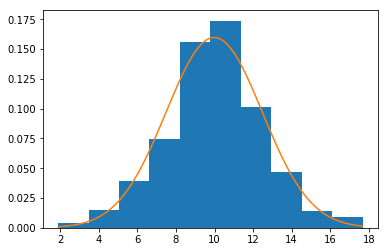

In [63]:
# Fit the data to a normal distribution
mu, std = scs.norm.fit(data)
print mu, std

# Plot data histogram and normalize it
plt.hist(data, normed=True)

# Plot the PDF (using sample mean and std)
x = np.linspace(data.min(), data.max(), 100)
p = scs.norm.pdf(x, mu, std)
plt.plot(x, p)

Note: We can also generate normal distribution sample directly using NumPy

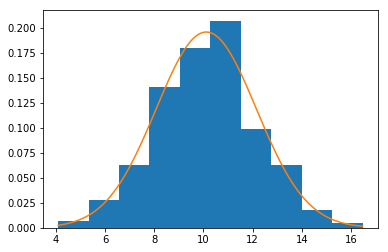

In [69]:
# We can generate random normal sample from NumPy
np_data = np.random.normal(loc=10, scale=2, size =500)

# Histogram of data
plt.hist(np_data, normed=True)

# Plot PDF
x = np.linspace(np_data.min(), np_data.max(),100)
p = scs.norm.pdf(x, np_data.mean(), np_data.std())
plt.plot(x, p)

# Poisson Distribution
Poisson distributions takes 1 parameter using lambda (SciPy calls it mu). Random variable: k

In [64]:
def plot_poisson(mu):
    x = np.arange(scs.poisson.ppf(0.01, mu), scs.poisson.ppf(0.99, mu), 0.01)
    p = scs.poisson.pmf(x, mu)
    plt.plot(x, p, 'k', linewidth=2)

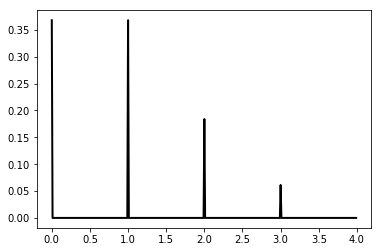

In [65]:
plot_poisson(1)

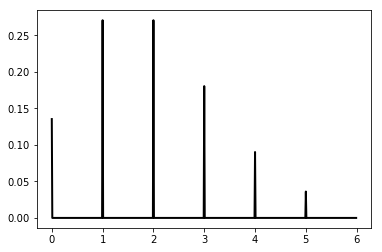

In [66]:
plot_poisson(2)

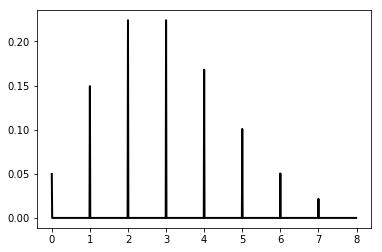

In [67]:
plot_poisson(3)

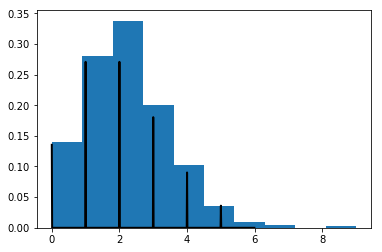

In [68]:
# Generate poisson sample data
data = scs.poisson.rvs(mu = 2, size=500)

# Histogram of sample data
plt.hist(data, normed=True)

# Plot Poisson PMF for lambda(mu) = 2
plot_poisson(2)

# Binomial Distribution
Bionimal distribution takes 3 parameters n and p. Random variable: k

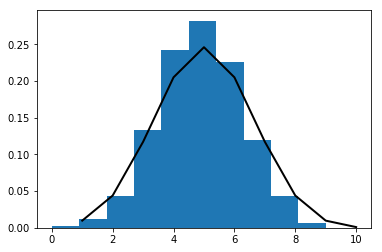

In [89]:
# Generate sample for binomial distribution
bn_data = scs.binom.rvs(n=10, p=0.5, size=1000)

# Histogram of data
plt.hist(bn_data, bins=10, normed=True)

# Plot PMF of binomial distribution
x = np.arange(1,11)
p = scs.binom.pmf(x, n=10, p=0.5)
plt.plot(x, p, 'k', linewidth=2)

# Gamma Distribution

# Beta Distribution

# Bernoulli Distribution